In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
f=open('parameters_for_monte_carlo.txt')
lines=f.readlines()
for line in lines:
    if ('-------' not in line):
            #line= line.replace('=',' ')
            #line=line.split()
            print line
            exec(line)


#--------------------------Activate only if you want override the parameter values from the input file---------------
Initial_values=[0.1,0.1,0.1,0.1,1.,1.]

Final_values=[20.,20.,20.,20.,20.,20.]
#Final_values=[0.2,0.2,0.2,0.2,0.2,0.2]

Integrate_over_logspace=True
#--------------------------------------------------------------------------------------------------------
Initial_values=numpy.array(Initial_values)
Final_values=numpy.array(Final_values)

if ((len(Initial_values)!=Dimensions)or(len(Final_values)!=Dimensions)):
    print "Warning!! Dinensional mismatch"
if (Integrate_over_logspace):
    Initial_values=numpy.log10(Initial_values)
    Final_values=numpy.log10(Final_values)

    
    


Dimensions=6

Initial_values=[0.001,0.001,0.001,0.001,0.001,0.001]

Final_values=[1.,1.,1.,1.,1.,1.]

Number_of_points=10

Integrate_over_logspace=True



TEST_MODE=True





In [3]:
Number_of_points=10

def get_test_integral():
    widths=Final_values-Initial_values
    scaled_points=numpy.random.rand(Number_of_points,Dimensions)
    actual_points=scaled_points*widths+Initial_values

    #---------------------------------Testing the range----------------------------------
    print "Testing the range"
    tolerance=1e-2
    t_actual_points=numpy.transpose(actual_points)
    for i in range(0,Dimensions):
        left_edge_gap=numpy.abs(numpy.amin(t_actual_points[i])-Initial_values[i])
        right_edge_gap=numpy.abs(numpy.amax(t_actual_points[i])-Final_values[i])
        if (left_edge_gap>tolerance):
            print "Warning! Range may not be correct for axis ",i," with left_edge_gap ",left_edge_gap
        if (right_edge_gap>tolerance):
            print "Warning! Range may not be correct for axis ",i," with right_edge_gap ",right_edge_gap

    #--------------------------------Performing a test integration-----------------------------
    if (TEST_MODE):
    
        def test_function(input_array):
            return numpy.product(input_array)**N

        if (Integrate_over_logspace):
            values=numpy.array([test_function(10**point)*numpy.product(10**point) for point in actual_points]) 
        else:
            values=numpy.array([test_function(point) for point in actual_points])
    
    
        phase_space_volume=numpy.product(widths)
        integral=numpy.average(values)*phase_space_volume
    
    
    
        if (Integrate_over_logspace):
            integral*=numpy.log(10)**Dimensions
            analytical_integral=numpy.product(((10**Final_values)**(N+1)-(10**Initial_values)**(N+1))/(N+1))
        else:
            analytical_integral=numpy.product((Final_values**(N+1)-Initial_values**(N+1))/(N+1))
    #print analytical_integral
        return integral,analytical_integral


In [4]:

integral_space=[]
an_integral_space=[]
Number_of_points_space=[5,10,100,1000,10000,50000,100000,1000000]
N=-2
for Number_of_points in Number_of_points_space:
        integrals=get_test_integral()
        integral_space.append(integrals[0])
        an_integral_space.append(integrals[1])

Testing the range
Warning! Range may not be correct for axis  0  with left_edge_gap  0.0181677639903
Warning! Range may not be correct for axis  0  with right_edge_gap  0.353053732905
Warning! Range may not be correct for axis  1  with left_edge_gap  0.341105155153
Warning! Range may not be correct for axis  1  with right_edge_gap  0.440797042791
Warning! Range may not be correct for axis  2  with left_edge_gap  0.362602448705
Warning! Range may not be correct for axis  2  with right_edge_gap  0.221323490661
Warning! Range may not be correct for axis  3  with left_edge_gap  0.686732350641
Warning! Range may not be correct for axis  3  with right_edge_gap  0.673863322128
Warning! Range may not be correct for axis  4  with left_edge_gap  0.229407188601
Warning! Range may not be correct for axis  4  with right_edge_gap  0.209131870801
Warning! Range may not be correct for axis  5  with left_edge_gap  0.0215340946915
Warning! Range may not be correct for axis  5  with right_edge_gap  0.183

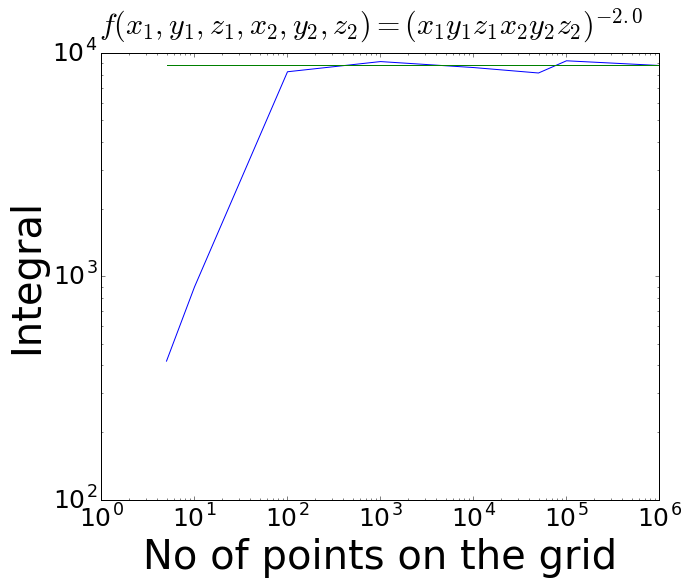

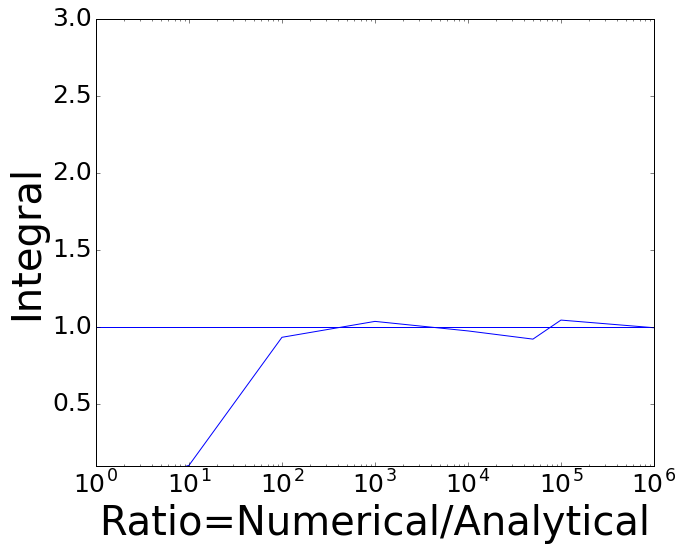

In [5]:
plt.figure(figsize=(10,8))
plt.suptitle('$f(x_1,y_1,z_1,x_2,y_2,z_2)=(x_1 y_1 z_1 x_2 y_2 z_2)^{%.1f}$'%N,fontsize=30)
plt.plot(Number_of_points_space,integral_space,label='Numerical integration')
plt.plot(Number_of_points_space,an_integral_space,label='Analytical integration')

plt.xlabel('No of points on the grid',fontsize=40)

plt.ylabel('Integral',fontsize=40)

plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.figure(figsize=(10,8))
plt.plot(Number_of_points_space,numpy.array(integral_space)/numpy.array(an_integral_space),label='Analytical integration')
plt.axhline(1)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.ylim(0.1,3)



plt.xlabel('Ratio=Numerical/Analytical',fontsize=40)

plt.ylabel('Integral',fontsize=40)

plt.xscale('log')
#plt.yscale('log')